# IMPORTACIÓN DE LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import numpy as np
import requests
import seaborn as sns
%matplotlib inline



plt.rcParams['figure.figsize']=(15, 8)

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns", None)


# LECTURA DE CSV

In [2]:
#Lectura of dataframes


dfevolucion = pd.read_excel('evolucion precio vivienda 2.xls')
dfhipotecas = pd.read_excel('hipoteca entidades financieras.xls')
dfdeuda = pd.read_excel('deuda segun barrio y distrito.xls')
dftransmisiones = pd.read_excel('transmisiones años posesion.xls')
dfeurometro = pd.read_excel('euro metro por vivienda .xls')
dfidealista = pd.read_excel('idealista  copia.xlsx')



In [3]:
#Rename de una columna


dfhipotecas.rename({"Ciudad de Madrid":"Distrito"},axis=1, inplace = True)


# FUNCION PARA MODIFICAR COLUMNA DISTRITO

In [4]:
def cambio(df , col):
    df[col] = df[col].str.split('.').str[1].tolist()
    df = df.sort_values(by = 'Distrito')
    
    return df

In [5]:
evol = cambio(dfevolucion,'Distrito')

In [6]:
len(evol.Distrito.unique())

160

In [7]:
deuda = cambio(dfdeuda,'Distrito')

In [8]:
len(deuda)

152

In [9]:
trans = cambio(dftransmisiones,'Distrito')

In [10]:
len(trans)

154

In [11]:
euro = cambio(dfeurometro,'Distrito')

In [12]:
len(euro)

152

In [13]:
hipo = cambio(dfhipotecas,'Distrito')

In [14]:
len(hipo)

21

In [15]:
deuda.head(2)

,Distrito,Hipoteca media,Tipo de interés medio,20 años
82,Abrantes,107708.87,2.59,575.30
17,Adelfas,215458.34,1.95,1084.39


In [16]:
euro.head(2)

,Distrito,Nueva,Usada
82,Abrantes,0.0,1935.95
17,Adelfas,0.0,4272.23


# MERGEADO DE LOS DATAFRAMES

In [17]:
df1 = pd.concat([deuda, euro[['Nueva', 'Usada']]], axis =1)

In [18]:
df2 = pd.merge(df1, evol, how = 'left', left_on = df1.Distrito, right_on = evol.Distrito)

In [19]:
df2 = df2.drop(columns = ['Distrito_x', 'Distrito_y'], axis = 1)
df2 = df2.rename(columns = {'key_0': 'Distrito'})

In [20]:
df3 = pd.merge(df2, trans, how = 'left', left_on = df2.Distrito, right_on = trans.Distrito)

In [21]:
df3 = df3.drop(columns = ['Distrito_x', 'Distrito_y',], axis = 1)
df3 = df3.rename(columns = {'key_0': 'Distrito'})


In [62]:
df3

,Distrito,Hipoteca media,Tipo de interés medio,20 años,Nueva,Usada,2020,2019,De 0 a 2,De 2 a 5,De 5 a 10,Más de 10
0,Abrantes,107708.87,2.59,575,0,1935,1925,1883,5,4,7,0
1,Adelfas,215458.34,1.95,1084,0,4272,0,0,41,13,12,42
2,Aeropuerto,0.00,0.00,0,0,0,..,..,2,0,1,3
3,Alameda de Osuna,177355.96,2.03,899,5115,3252,3376,3273,10,5,8,40
4,Almagro,587884.85,1.93,2955,0,6787,6462,6728,27,12,17,71
5,Almenara,157192.35,2.08,801,2134,3175,0,0,10,120,6,50
6,Almendrales,204809.99,2.41,1076,2882,2040,1927,2180,26,9,10,50
7,Aluche,142775.15,2.33,744,3244,2208,2164,2212,20,14,17,133
8,Amposta,85897.54,2.33,448,0,1797,1880,2073,7,4,8,24
9,Apóstol Santiago,196221.72,2.53,1042,0,3642,2770,2850,8,5,8,20


# SCRAPING DE IDEALISTA

Finalmente no puedo usarlo por que los datos no coinciden 

In [23]:
import time
from selenium import webdriver


url='https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/report/'
PATH='chromedriver'
driver=webdriver.Chrome(PATH)
driver.get(url)

time.sleep(20) 

aceptar=driver.find_element_by_xpath('/html/body/div[1]/div/div/div/div/div[2]/button[2]')

time.sleep(40) 

cabeceras=driver.find_element_by_tag_name('thead')

cabeceras=[c.text for c in cabeceras.find_elements_by_tag_name('th')]


tabla=driver.find_element_by_tag_name('tbody')

filas= tabla.find_elements_by_tag_name('tr')

datos=[]

for f in filas:
    
    datos.append([e.text for e in f.find_elements_by_tag_name('td')])


datos=[[e.text for e in f.find_elements_by_tag_name('td')] for f in filas]


driver.quit()


In [24]:
dfhipotecas.head(4)

,Distrito,Bancos Libre,Bancos Protegida,Unnamed: 3,Private equity libre,Private equity lprotegida
0,Centro,93.79,0.0,NaN,6.21,0.0
1,Arganzuela,99.45,0.3,NaN,0.25,0.0
2,Retiro,78.14,0.0,NaN,21.86,0.0
3,Salamanca,83.61,0.0,NaN,16.39,0.0


In [25]:
dfhipotecas.head(4)

,Distrito,Bancos Libre,Bancos Protegida,Unnamed: 3,Private equity libre,Private equity lprotegida
0,Centro,93.79,0.0,NaN,6.21,0.0
1,Arganzuela,99.45,0.3,NaN,0.25,0.0
2,Retiro,78.14,0.0,NaN,21.86,0.0
3,Salamanca,83.61,0.0,NaN,16.39,0.0


In [26]:
dftransmisiones.head(4)

,Distrito,De 0 a 2,De 2 a 5,De 5 a 10,Más de 10
0,NaN,De 0 a 2,De 2 a 5,De 5 a 10,Más de 10
1,NaN,3304,1868,1705,7114
2,Centro,239,170,173,499
3,Palacio,35,13,6,55


In [27]:
dfeurometro.head(4)

,Distrito,Nueva,Usada
0,Centro,5468.63,5194.16
1,Palacio,5082.76,5020.78
2,Embajadores,5464.51,4496.74
3,Cortes,0.00,4989.95


In [28]:
dfidealista.head(4)

,Localización,Precio m2 mayo 2021,Máximo histórico,Fecha
0,Madrid Comunidad,2927,2927,2021
1,Madrid provincia,2927,2927,2021
2,Madrid,3746,3822,2019
3,Alcalá de Henares,1838,2472,2008


# RENAME OF COLUMS, DROP

In [29]:
#Rename of columns dftransmisiones

dftransmisiones.rename({"Columna1":"Ciudad de Madrid","Columna3":"0 a 2 años",
                        "Columna4":"2 a 4 años","Columna5":"4 a 6 años","Columna6":"Mas de 10 años" },axis=1, inplace = True)



dfevolucion.rename({"Distrito":"Ciudad de Madrid"},axis=1, inplace = True)

dfeurometro.rename({"ciudad de madrid":"Ciudad de Madrid"},axis=1, inplace = True)

#Drop rows


dftransmisiones = dftransmisiones.iloc[1: , :]
dfhipotecas.drop('Unnamed: 3', axis=1, inplace=True)

# CONVERTED FROM DECIMALS TO INTEGERS

In [30]:
#dfeurometro = dfeurometro.astype({"Nueva":'int', "Usada":'int'})

In [31]:
#limpiar_hipoteca(dfhipotecas,"Ciudad de Madrid")

# FINAL DATAFRAMES

In [32]:
#Dataframes limpios

#dfeurometro = limpiar_distritos(dfeurometro,"Ciudad de Madrid")
#dfhipotecas = limpiar_distritos(dfhipotecas,"Ciudad de Madrid")
#dfdeuda = limpiar_distritos(dfdeuda,"Ciudad de Madrid")
#dftransmisiones = limpiar_distritos(dftransmisiones,"Ciudad de Madrid")
#dfevolucion = limpiar_distritos(dfevolucion,"Ciudad de Madrid")


# WEB SCRAPING SELENIUM

Finalmente no lo uso por que los datos no coinciden. Por lo tanto puedo realizar el analisis con los demas Dataframes

In [33]:
#import time
#from selenium import webdriver

#url='https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/report/'
#PATH='chromedriver'
#driver=webdriver.Chrome(PATH)
#driver.get(url)
#time.sleep(40) 
#aceptar=driver.find_element_by_xpath('/html/body/div[1]/div/div/div/div/div[2]/button[2]')
#time.sleep(40) 
#cabeceras=driver.find_element_by_tag_name('thead')
#cabeceras=[c.text for c in cabeceras.find_elements_by_tag_name('th')]
#tabla=driver.find_element_by_tag_name('tbody')
#filas= tabla.find_elements_by_tag_name('tr')


#datos=[]



#for f in filas:    
    #datos.append([e.text for e in f.find_elements_by_tag_name('td')])
#datos=[[e.text for e in f.find_elements_by_tag_name('td')] for f in filas]
#driver.quit()


In [34]:
#final = pd.merge(df3, dfidealista, how = 'left', left_on = df3.Distrito, right_on = dfidealista.Distrito)

In [35]:
#final = final.drop(columns = ['Distrito_x', 'Distrito_y'], axis = 1)
#final = final.rename(columns = {'key_0': 'Distrito'})

 EXPORTO DATAFRAME FINAL

In [36]:
df3.to_excel("real_estate.xlsx")

# EDA & VISUALIZACION

In [37]:
corr = df3.corr()

In [38]:
def Heatmap():

    
    sns.set(style='white')  

    mascara = np.triu(np.ones_like(corr, dtype=bool)) 

    color_map = sns.diverging_palette(0, 10, as_cmap=True)  

    return sns.heatmap(corr,
                       mask=mascara,
                       cmap=color_map,
                       vmax=1,  
                       center=0,
                       square=True,  
                       linewidth=.5,  
                       cbar_kws={'shrink': .5}) 

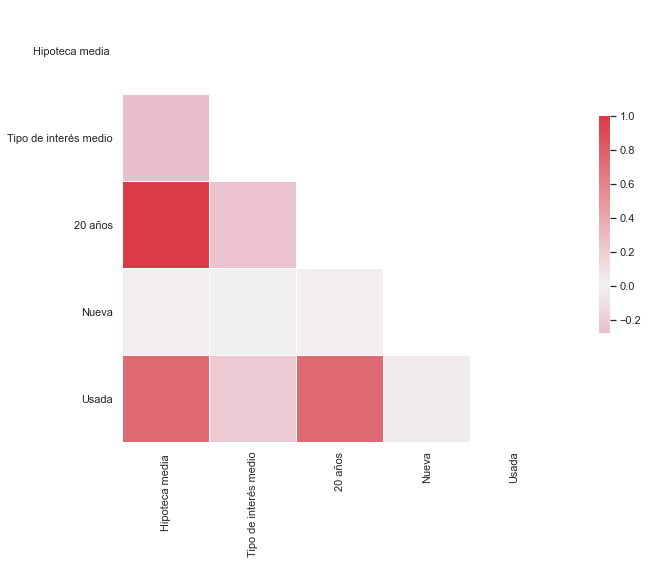

In [39]:
Heatmap();

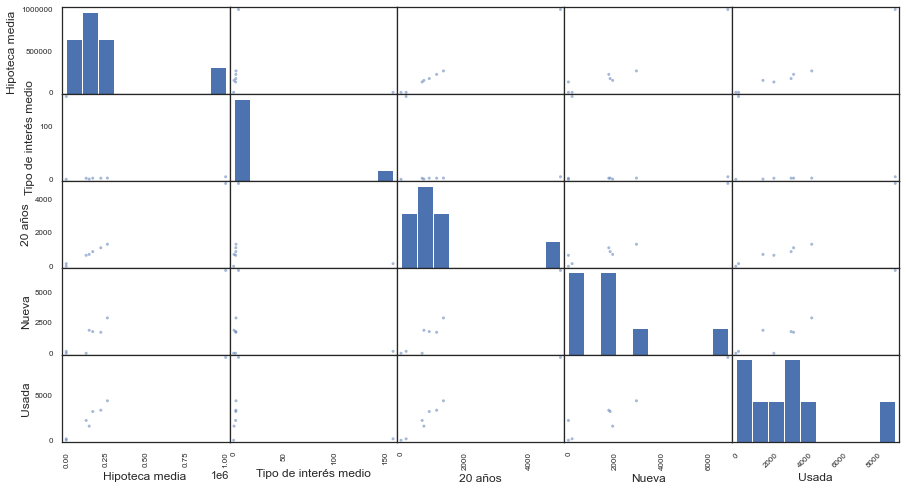

In [40]:
dfvisual = df3.describe()

pd.read_excel('real_estate.xlsx')

pd.plotting.scatter_matrix(dfvisual, figsize=(15, 8))

plt.xticks(rotation=45);

In [41]:
df3.isnull().sum()

Distrito                  0
Hipoteca media            0
Tipo de interés medio     0
20 años                   0
Nueva                     0
Usada                     0
2020                     42
2019                     42
De 0 a 2                  0
De 2 a 5                  0
De 5 a 10                 0
Más de 10                 0
dtype: int64

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Distrito               158 non-null    object 
 1   Hipoteca media         158 non-null    float64
 2   Tipo de interés medio  158 non-null    float64
 3   20 años                158 non-null    float64
 4   Nueva                  158 non-null    float64
 5   Usada                  158 non-null    float64
 6   2020                   116 non-null    object 
 7   2019                   116 non-null    object 
 8   De 0 a 2               158 non-null    object 
 9   De 2 a 5               158 non-null    object 
 10  De 5 a 10              158 non-null    object 
 11  Más de 10              158 non-null    object 
dtypes: float64(5), object(7)
memory usage: 16.0+ KB


In [43]:
df3

,Distrito,Hipoteca media,Tipo de interés medio,20 años,Nueva,Usada,2020,2019,De 0 a 2,De 2 a 5,De 5 a 10,Más de 10
0,Abrantes,107708.87,2.59,575.30,0.00,1935.95,1925,1883,5,4,7,0
1,Adelfas,215458.34,1.95,1084.39,0.00,4272.23,NaN,NaN,41,13,12,42
2,Aeropuerto,0.00,0.00,0.00,0.00,0.00,..,..,2,0,1,3
3,Alameda de Osuna,177355.96,2.03,899.64,5115.73,3252.99,3376,3273,10,5,8,40
4,Almagro,587884.85,1.93,2955.87,0.00,6787.95,6462,6728,27,12,17,71
5,Almenara,157192.35,2.08,801.49,2134.99,3175.22,NaN,NaN,10,120,6,50
6,Almendrales,204809.99,2.41,1076.38,2882.75,2040.64,1927,2180,26,9,10,50
7,Aluche,142775.15,2.33,744.86,3244.94,2208.90,2164,2212,20,14,17,133
8,Amposta,85897.54,2.33,448.07,0.00,1797.73,1880,2073,7,4,8,24
9,Apóstol Santiago,196221.72,2.53,1042.93,0.00,3642.94,2770,2850,8,5,8,20


In [44]:
df3['20 años'] = df3['20 años'].astype(int)

In [45]:
df3['Nueva'] = df3['Nueva'].astype(int)

In [46]:
df3['Usada'] = df3['Usada'].astype(int)

In [52]:
df3 = df3.fillna(0)

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Distrito               158 non-null    object 
 1   Hipoteca media         158 non-null    float64
 2   Tipo de interés medio  158 non-null    float64
 3   20 años                158 non-null    int64  
 4   Nueva                  158 non-null    int64  
 5   Usada                  158 non-null    int64  
 6   2020                   158 non-null    object 
 7   2019                   158 non-null    object 
 8   De 0 a 2               158 non-null    object 
 9   De 2 a 5               158 non-null    object 
 10  De 5 a 10              158 non-null    object 
 11  Más de 10              158 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 16.0+ KB


In [56]:
df3.to_excel("real_estate_final_presentacion.xlsx")

,Distrito,Hipoteca media,Tipo de interés medio,20 años,Nueva,Usada,2020,2019,De 0 a 2,De 2 a 5,De 5 a 10,Más de 10
0,Abrantes,107708.87,2.59,575,0,1935,1925,1883,5,4,7,0
1,Adelfas,215458.34,1.95,1084,0,4272,0,0,41,13,12,42
2,Aeropuerto,0.00,0.00,0,0,0,..,..,2,0,1,3
3,Alameda de Osuna,177355.96,2.03,899,5115,3252,3376,3273,10,5,8,40
4,Almagro,587884.85,1.93,2955,0,6787,6462,6728,27,12,17,71
5,Almenara,157192.35,2.08,801,2134,3175,0,0,10,120,6,50
6,Almendrales,204809.99,2.41,1076,2882,2040,1927,2180,26,9,10,50
7,Aluche,142775.15,2.33,744,3244,2208,2164,2212,20,14,17,133
8,Amposta,85897.54,2.33,448,0,1797,1880,2073,7,4,8,24
9,Apóstol Santiago,196221.72,2.53,1042,0,3642,2770,2850,8,5,8,20
